In [ ]:
# 1.0 References
# 2.0 Library imports
# 3.0 Function definitions
# 4.0 Global variables
# 4.0 Data inputs
# 5.0 Remove plate label
    # 5.1 Find text color threshhold
    # 5.2 Set text color to null
# Edge detection
# Threshhold for agar vs. mycelium
# Count of agar
# Count of mycelium

In [ ]:
# 1.0 References
    # Open CV
    # https://www.udemy.com/the-python-mega-course/learn/v4/t/lecture/5941086
    # https://www.udemy.com/the-python-mega-course/learn/v4/t/lecture/5163302
    # https://www.udemy.com/the-python-mega-course/learn/v4/t/lecture/5163304
    # https://docs.scipy.org/doc/numpy/user/quickstart.html
    # https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed
    # https://www.geeksforgeeks.org/python-remove-part-of-an-image/
    # https://realpython.com/image-processing-with-the-python-pillow-library/
    # https://pyimagesearch.com/2021/01/19/opencv-bitwise-and-or-xor-and-not/
    # https://stackoverflow.com/questions/56778752/convert-to-rgb-returns-a-rgba-image
    # https://stackoverflow.com/questions/12270163/python-pil-how-do-i-convert-1-bit-deep-images-to-rgba
    # https://stackoverflow.com/questions/47941077/saving-rgba-image-with-pil-image-frombuffer
    # https://stackoverflow.com/questions/25537137/32-bit-rgba-numpy-array-from-pil-image
    # https://stackoverflow.com/questions/57736832/how-can-you-read-rgba-using-opencv
    # https://stackoverflow.com/questions/33713199/map-an-array-to-each-item-in-another-array-python
    # https://www.geeksforgeeks.org/map-elements-of-an-array-to-elements-of-another-array/
    # https://stackoverflow.com/questions/76988988/what-is-the-pythonic-way-to-add-an-array-of-dimensions-y-x-to-the-bottom-an-ar
    # https://stackoverflow.com/questions/7372316/how-to-make-a-2d-numpy-array-a-3d-array
    # https://stackoverflow.com/questions/39642721/adding-alpha-channel-to-rgb-array-using-numpy
    # https://stackoverflow.com/questions/54703674/how-do-i-make-my-numpy-image-take-an-alpha-channel-value-in-python

In [1]:
# 2.0 Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image, ImageDraw
from numpy import zeros, newaxis

In [2]:
# 3.0 Function definitions
def display_img(img,cmap=None):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

In [3]:
# 4.0 Global variables
img_file_og = "Mal2_image_code_8.21.23.jpg"

In [4]:
# 5.0 Data input
img_raw_clr = cv2.imread(img_file_og,1) # second argument: 0=gray-scale, 1=BGR (python is reverse of RGB)
img_raw_grey = cv2.imread(img_file_og,0) # second argument: 0=gray-scale, 1=BGR (python is reverse of RGB)

In [5]:
# 5.1 data geometry
print('Image type: ', type(img_raw_clr))
print('Image shape: ', img_raw_clr.shape)

Image type:  <class 'numpy.ndarray'>
Image shape:  (2914, 3214, 3)


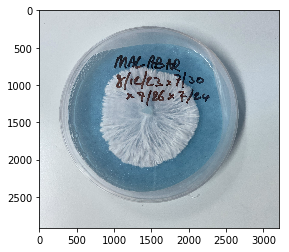

In [6]:
plt.imshow(img_raw_clr);

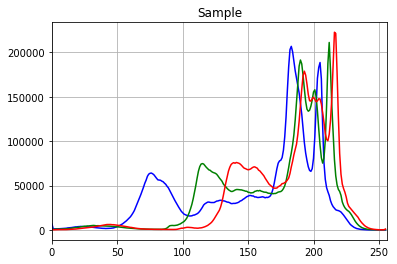

In [7]:
img = img_raw_clr
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Sample')
plt.grid(True)
plt.show();

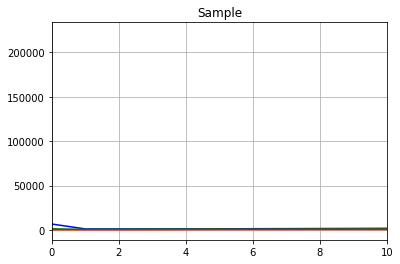

In [8]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,10])
plt.title('Sample')
plt.grid(True)
plt.show();

In [9]:
print('Image type: ', type(img_raw_grey))
print('Image shape: ', img_raw_grey.shape)

Image type:  <class 'numpy.ndarray'>
Image shape:  (2914, 3214)


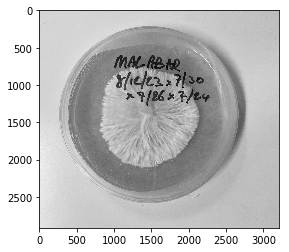

In [10]:
plt.imshow(img_raw_grey, cmap = 'gray');

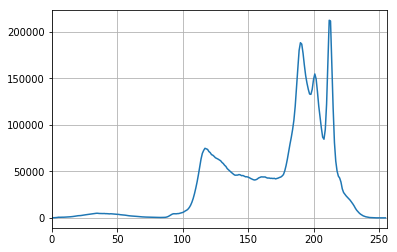

In [11]:
# 5.1 Analyze original image input object (look for non-binary content to establish white/black threshold point)
# black = 0
# white = 255
# distribution of white and black pixels
hist_values_img_raw_grey = cv2.calcHist([img_raw_grey],channels=[0],mask=None,histSize=[256],ranges=[0,256])
plt.grid(True)
plt.xlim([0,256])
plt.plot(hist_values_img_raw_grey);

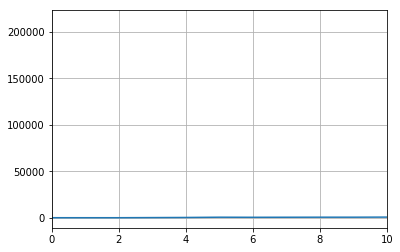

In [12]:
# Black end of scale only
hist_values_img_raw_grey = cv2.calcHist([img_raw_grey],channels=[0],mask=None,histSize=[256],ranges=[0,256])
plt.grid(True)
plt.xlim([0,10])
plt.plot(hist_values_img_raw_grey);

In [13]:
# 6.0 Isolate written label in the image using thresholding
# 6.1 Set a binary threshhold to isolate label color
max_val = 175
half_max = int(max_val/2)
ret,thresh_raw_grey = cv2.threshold(img_raw_grey,half_max,max_val,cv2.THRESH_BINARY)

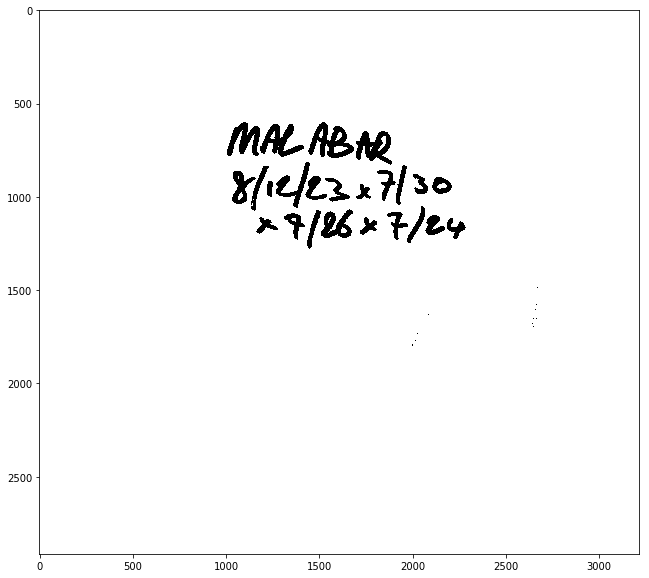

In [14]:
display_img(thresh_raw_grey, cmap='gray')

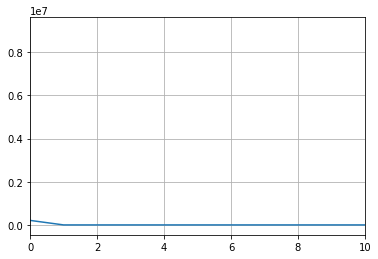

In [15]:
# thresholded image analysis
hist_values_thresh_raw_grey = cv2.calcHist([thresh_raw_grey],channels=[0],mask=None,histSize=[256],ranges=[0,256])
plt.grid(True)
plt.xlim([0,10])
plt.plot(hist_values_thresh_raw_grey);

In [16]:
# polarize image using cut point = 10
# black = 0
# white = 255
cut_pt = 10

text_array = np.asarray(thresh_raw_grey)

text_array[text_array <= cut_pt] = 0
text_array[text_array > cut_pt] = 255

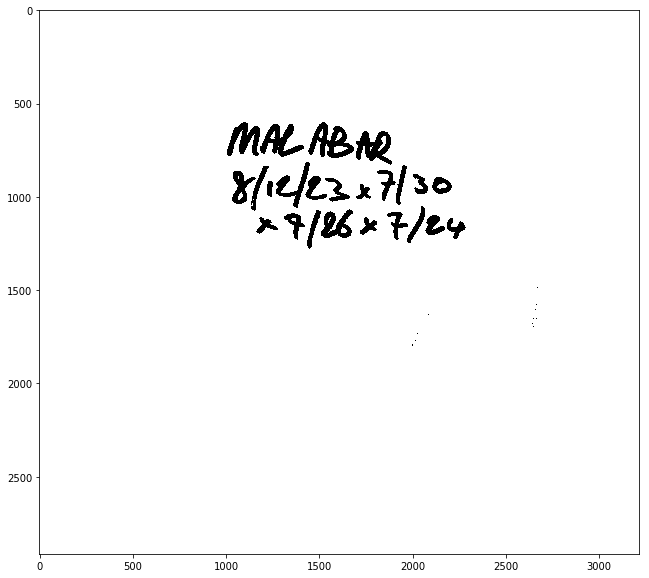

In [17]:
text_img_adj = Image.fromarray(text_array)
display_img(text_img_adj, cmap='gray')

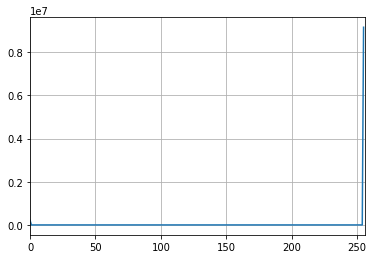

In [18]:
# check the split of white and black pixels
hist_values_text_array = cv2.calcHist([text_array],channels=[0],mask=None,histSize=[256],ranges=[0,256])
plt.grid(True)
plt.xlim([0,256])
plt.plot(hist_values_text_array);

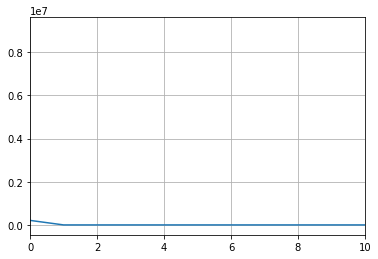

In [19]:
# check the split of white and black pixels - black end
hist_values_text_array = cv2.calcHist([text_array],channels=[0],mask=None,histSize=[256],ranges=[0,256])
plt.grid(True)
plt.xlim([0,10])
plt.plot(hist_values_text_array);

In [20]:
# convert to rgba
img_raw_rgba = cv2.cvtColor(img_raw_clr, cv2.COLOR_BGR2BGRA)

In [21]:
img_raw_rgba.shape

(2914, 3214, 4)

In [22]:
# https://stackoverflow.com/questions/54703674/how-do-i-make-my-numpy-image-take-an-alpha-channel-value-in-python
# Load image and ensure it is 3-channel RGB...
# ... not 1-channel greyscale, not 4-channel RGBA, not 1-channel palette
img_clr = Image.open(img_file_og).convert('RGB')

In [23]:
# Make into Numpy array of RGB and get dimensions
RGB_arr = np.array(img_clr)
h, w = RGB_arr.shape[:2]
h,w

(2914, 3214)

In [24]:
# Add an alpha channel, fully opaque (255)
RGBA_arr = np.dstack((RGB_arr, np.zeros((h,w),dtype=np.uint8)+255))

In [25]:
# Make mask of black pixels - mask is True where image is black
mBlack = (RGBA_arr[:, :, 0:3] == [0,0,0]).all(2)

In [26]:
# Make all pixels matched by mask into transparent ones
RGBA_arr[mBlack] = (0,0,0,0)

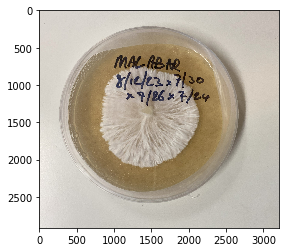

In [27]:
plt.imshow(RGBA_arr);

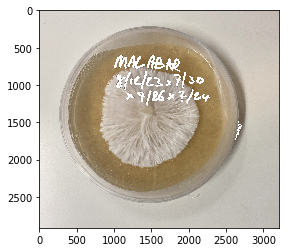

In [36]:
img_clr = Image.open(img_file_og).convert('RGB')
RGB_arr = np.array(img_clr)
h, w = RGB_arr.shape[:2]
RGBA_arr = np.dstack((RGB_arr, np.zeros((h,w),dtype=np.uint8)+255))

# Make mask of black pixels - mask is True where image is black
cp = 100
mBlack = (RGBA_arr[:, :, 0:3] <= [cp,cp,cp]).all(2)
# Make all pixels matched by mask into transparent ones
RGBA_arr[mBlack] = (0,0,0,0)
plt.imshow(RGBA_arr);